## __Final Project:__ Portfolio Selection and Allocation without Machine Learning Model (KMeans Clustering)

In [29]:
import numbers
import numpy as np
import scipy as sc
import pandas as pd
import random
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Import from mlfinlab
from mlfinlab.portfolio_optimization.cla import CriticalLineAlgorithm
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution
from mlfinlab.portfolio_optimization.hrp import HierarchicalRiskParity
from mlfinlab.portfolio_optimization.mean_variance import MeanVarianceOptimisation
from mlfinlab.portfolio_optimization import ReturnsEstimators

%matplotlib inline
np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
#import historical stock prices data from 2015 - 2020

BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.tail(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,4750.00000,1980.00000,180.00000,2170.92505,231.78900,1850.00000,2270.00000,2152.17383,422.00000,875.00000,...,348.31320,860.00000,216.00000,590.00000,197.00000,1625.00000,9350.00000,326.00000,112.50001,204.00000
2020-07-14,4720.00000,1990.00000,185.00000,2200.00000,231.78900,1880.00000,2260.00000,2142.60864,430.00000,890.00000,...,344.58792,875.00000,226.00000,590.00000,195.00000,1610.00000,9375.00000,330.00000,114.00000,202.00000
2020-07-15,4710.00000,1980.00000,195.00000,2210.00000,231.78900,1850.00000,2270.00000,2133.04346,428.00000,940.00000,...,339.00000,875.00000,226.00000,580.00000,200.00000,1625.00000,9375.00000,338.00000,107.00000,204.00000
2020-07-16,4700.00000,1990.00000,194.00000,2220.00000,231.78900,1825.00000,2250.00000,2056.52173,438.00000,940.00000,...,339.00000,870.00000,250.00000,590.00000,200.00000,1675.00000,9350.00000,328.00000,102.00000,208.00000
2020-07-17,4670.00000,1995.00000,200.00000,2190.00000,234.00000,1870.00000,2260.00000,2133.04346,438.00000,945.00000,...,340.00000,865.00000,234.00000,600.00000,204.00000,1725.00000,9600.00000,324.00000,98.00000,208.00000
2020-07-20,4540.00000,2000.00000,212.00000,2160.00000,226.00000,1870.00000,2250.00000,2190.43481,436.00000,990.00000,...,324.00000,880.00000,218.00000,600.00000,202.00000,1800.00000,9600.00000,322.00000,101.00000,202.00000
2020-07-21,4680.00000,2000.00000,216.00000,2190.00000,238.00000,1875.00000,2300.00000,2152.17383,430.00000,1005.00000,...,334.00000,875.00000,224.00000,600.00000,195.00000,1790.00000,9800.00000,324.00000,98.00000,202.00000
2020-07-22,4670.00000,2010.00000,226.00000,2260.00000,238.00000,1875.00000,2260.00000,2200.00000,434.00000,1000.00000,...,330.00000,880.00000,212.00000,600.00000,195.00000,1800.00000,9750.00000,324.00000,98.00000,202.00000
2020-07-23,4710.00000,1995.00000,220.00000,2330.00000,238.00000,1880.00000,2300.00000,2200.00000,442.00000,1015.00000,...,324.00000,875.00000,214.00000,600.00000,196.00000,1915.00000,9725.00000,336.00000,100.00000,204.00000


## _Weekly Resampling_

In [8]:
stock_prices_downsampled = stock_prices.resample('W').last()
stock_prices_downsampled.head()

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-15,6872.44336,1047.50806,85.96618,1747.92261,311.81635,1563.35913,6074.72705,1881.15942,1497.19727,914.36279,...,317.76260,902.42902,203.16278,1044.48962,384.35818,1351.41052,9103.18262,165.49091,103.13461,338.76129
2018-07-22,6872.44336,925.92230,85.28928,1766.03564,315.52847,1563.35913,5629.09082,1908.68860,1497.19727,973.35394,...,322.57718,910.74640,194.37209,949.12317,384.35818,1329.82251,9103.18262,176.52364,103.13461,344.13846
2018-07-29,7062.02783,897.86407,84.61238,1738.86585,339.65710,1563.35913,6332.72705,1871.98303,1529.05249,983.18585,...,324.18207,944.01562,194.37209,940.04071,386.24228,1467.98596,9080.42481,181.12061,108.29134,362.06232
2018-08-05,7488.59326,888.51135,85.28928,1779.62061,361.92972,1609.34021,6356.18164,1927.04138,1510.84961,1189.65491,...,306.52856,973.12622,194.37209,908.25189,384.35818,1463.66834,8966.63574,246.39758,110.01025,367.43948
2018-08-12,7559.68750,963.33331,100.85796,1775.09216,354.50549,1563.35913,6285.81836,1963.74683,1492.64661,1194.57080,...,314.55289,977.28497,194.37209,894.62811,374.93765,1506.84436,9057.66699,257.43030,109.15080,372.81668


In [9]:
#Calculating the percentage change with the previous day price for each asset. This gives us the return for the asset for different time periods

stock_returns = stock_prices_downsampled.pct_change().dropna(how='all')
stock_returns.head()

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-22,0.00000,-0.11607,-0.00787,0.01036,0.01190,0.00000,-0.07336,0.01463,0.00000,0.06452,...,0.01515,0.00922,-0.04327,-0.09130,0.00000,-0.01597,0.00000,0.06667,0.00000,0.01587
2018-07-29,0.02759,-0.03030,-0.00794,-0.01538,0.07647,0.00000,0.12500,-0.01923,0.02128,0.01010,...,0.00498,0.03653,0.00000,-0.00957,0.00490,0.10390,-0.00250,0.02604,0.05000,0.05208
2018-08-05,0.06040,-0.01042,0.00800,0.02344,0.06557,0.02941,0.00370,0.02941,-0.01190,0.21000,...,-0.05446,0.03084,0.00000,-0.03382,-0.00488,-0.00294,-0.01253,0.36041,0.01587,0.01485
2018-08-12,0.00949,0.08421,0.18254,-0.00254,-0.02051,-0.02857,-0.01107,0.01905,-0.01205,0.00413,...,0.02618,0.00427,0.00000,-0.01500,-0.02451,0.02950,0.01015,0.04478,-0.00781,0.01463
2018-08-19,-0.11285,0.00000,-0.10067,-0.00765,-0.09424,-0.05882,-0.08955,0.00000,-0.07317,0.08642,...,-0.00510,-0.00426,0.00000,-0.01523,-0.03518,-0.07450,-0.01005,-0.07857,-0.04724,-0.08173


## Computing the Covariance of the Return, V.

<Figure size 504x504 with 0 Axes>

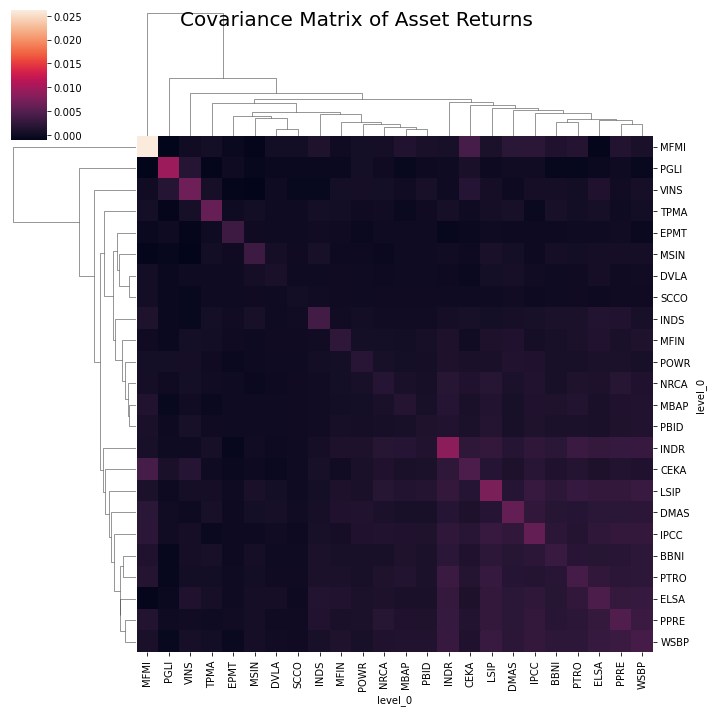

In [10]:
V = stock_returns.cov()
plt.figure(figsize=(7, 7))
g = sns.clustermap(V)
g.fig.suptitle('Covariance Matrix of Asset Returns', fontsize = 20)
plt.show()

## Identifying the hierarchical clusters among the N strategies

In [11]:
correlation = stock_returns.corr()
distances = np.sqrt((1 - correlation) / 2)
clusters = linkage(squareform(distances), method="single")
clusters

array([[18.        , 23.        ,  0.36890145,  2.        ],
       [ 4.        , 24.        ,  0.39721477,  3.        ],
       [ 0.        , 25.        ,  0.42289485,  4.        ],
       [15.        , 26.        ,  0.43062329,  5.        ],
       [14.        , 27.        ,  0.43196635,  6.        ],
       [19.        , 28.        ,  0.43615467,  7.        ],
       [10.        , 29.        ,  0.44901743,  8.        ],
       [ 9.        , 30.        ,  0.46760648,  9.        ],
       [ 6.        , 31.        ,  0.4704402 , 10.        ],
       [ 8.        , 32.        ,  0.47830716, 11.        ],
       [ 1.        , 33.        ,  0.52588008, 12.        ],
       [ 2.        , 34.        ,  0.52953003, 13.        ],
       [11.        , 35.        ,  0.53827284, 14.        ],
       [17.        , 36.        ,  0.54292337, 15.        ],
       [12.        , 37.        ,  0.56100716, 16.        ],
       [ 7.        , 38.        ,  0.56163257, 17.        ],
       [ 3.        , 13.

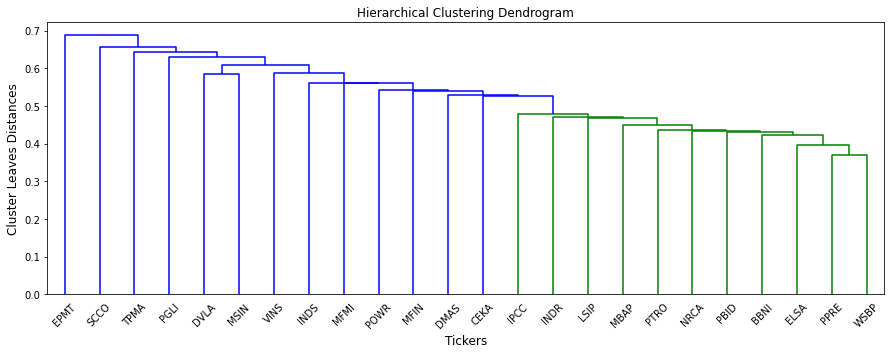

In [12]:
columns = stock_returns.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters, labels=columns)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Cluster Leaves Distances', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()


<Figure size 504x504 with 0 Axes>

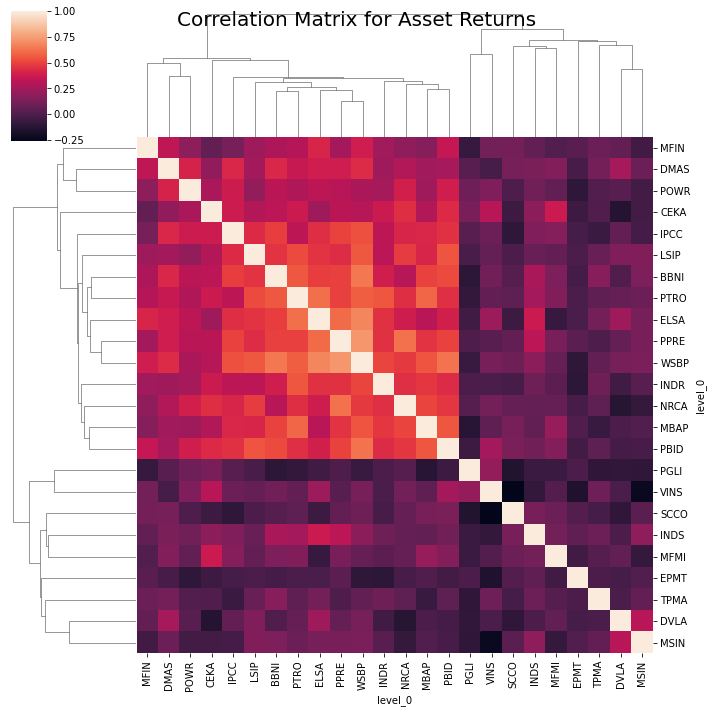

In [13]:
## Plot the clustered correlation matrix of the N strategies

plt.figure(figsize=(7, 7))
g = sns.clustermap(stock_returns.corr())
g.fig.suptitle('Correlation Matrix for Asset Returns', fontsize = 20)
plt.show()

## Computing the HRP allocations

In [26]:
hrp = HierarchicalRiskParity()
hrp.allocate(asset_prices=stock_prices)
hrp_weights = hrp.weights.sort_values(by=0, ascending=False, axis=1)
hrp_weights.T

,0
level_0,
SCCO,0.33232
DVLA,0.09994
MFIN,0.05679
MSIN,0.05130
INDS,0.05104
NRCA,0.04601
MBAP,0.04098
EPMT,0.04080
PBID,0.03953


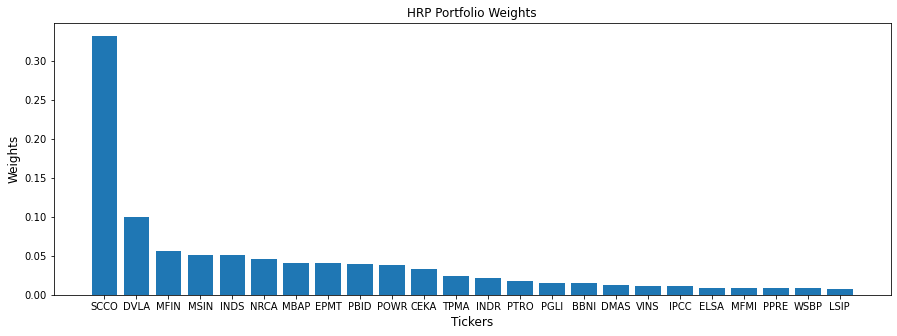

In [16]:
plt.figure(figsize=(15, 5))
plt.bar(hrp_weights.columns, hrp_weights.values[0])
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.title('HRP Portfolio Weights', fontsize=12)
plt.show()

## Computing the minimum variance (min volatility) solution using Critical Line Algorithm

In [27]:
cla = CriticalLineAlgorithm()
cla.allocate(asset_prices=stock_prices, resample_by='W', solution='min_volatility')
cla_weights = cla.weights.sort_values(by=0, ascending=False, axis=1)
cla_weights.T

,0
level_0,
SCCO,0.49933
DVLA,0.20500
EPMT,0.05437
VINS,0.04369
NRCA,0.03493
POWR,0.03323
MBAP,0.03090
PGLI,0.02893
TPMA,0.02426


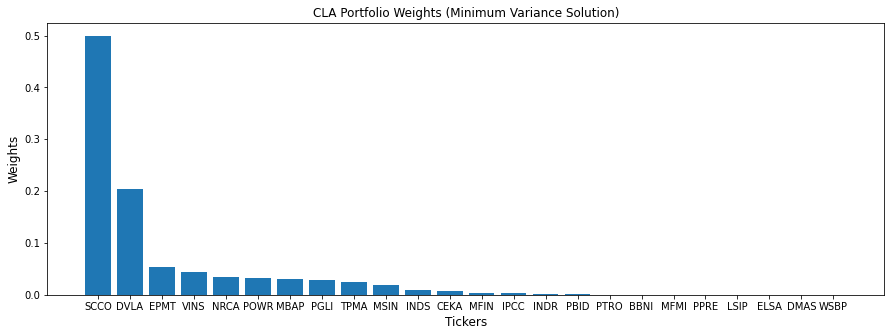

In [19]:
plt.figure(figsize=(15, 5))
plt.bar(cla_weights.columns, cla_weights.values[0])
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.title('CLA Portfolio Weights (Minimum Variance Solution)', fontsize=12)
plt.show()

## Computing Inverse Variance Portfolio Allocations

In [43]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_prices=stock_prices, solution='inverse_variance')
ivp_weights = mvo.weights.sort_values(by=0, ascending=False, axis=1)
ivp_weights.T

,0
level_0,
SCCO,0.21448
NRCA,0.08027
PBID,0.06896
MBAP,0.06597
DVLA,0.06489
POWR,0.06167
PTRO,0.04199
BBNI,0.03890
MFIN,0.03404


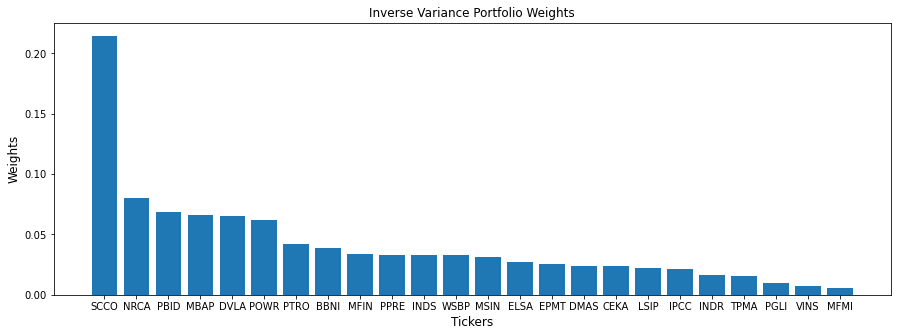

In [25]:
plt.figure(figsize=(15, 5))
plt.bar(ivp_weights.columns, ivp_weights.values[0])
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.title('Inverse Variance Portfolio Weights', fontsize=12)
plt.show()

## Computing Asset Returns

In [30]:
ret_est = ReturnsEstimators()
stocks_returns = ret_est.calculate_returns(stock_prices)
stocks_returns.iloc[:,0:10].head()

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP
Date,,,,,,,,,,
2018-07-10,0.01389,0.03196,-0.00775,0.00000,-0.04545,0.00000,0.08772,0.01478,-0.03790,-0.00529
2018-07-11,-0.01712,-0.00442,-0.01562,0.00000,-0.00595,0.00000,0.06048,0.00000,0.00000,-0.02128
2018-07-12,-0.02091,-0.00444,0.00794,0.00000,0.00599,0.00000,-0.01901,0.01456,0.00000,0.02174
2018-07-13,0.03203,0.00000,0.00000,0.00000,0.00000,0.00000,0.00388,-0.01914,-0.00303,-0.01064
2018-07-16,0.01379,-0.01786,-0.00787,0.00518,-0.02381,0.00000,-0.04247,-0.01463,-0.00912,-0.01613


## Annualized Returns

In [36]:
assets_annual_returns = ret_est.calculate_mean_historical_returns(stock_prices, frequency=252)
assets_annual_returns.sort_values(ascending=False)

level_0
MFMI    0.69197
DMAS    0.58523
TPMA    0.53748
CEKA    0.45602
VINS    0.41665
PGLI    0.40548
PTRO    0.24444
EPMT    0.20937
MFIN    0.19219
LSIP    0.17236
INDS    0.17032
DVLA    0.17024
NRCA    0.05452
SCCO    0.04693
PBID    0.02008
ELSA   -0.04615
BBNI   -0.10770
WSBP   -0.14681
MSIN   -0.16638
MBAP   -0.18508
INDR   -0.19888
POWR   -0.20780
PPRE   -0.23663
IPCC   -0.46961
dtype: float64

In [41]:
print('The portfolio selection give expected annual return: ', assets_annual_returns.mean()*100, 'percent')

The portfolio selection give expected annual return:  10.867707207292144 percent


In [35]:
assets_exp_annual_returns = ret_est.calculate_exponential_historical_returns(stock_prices, frequency=252, span=200)
assets_exp_annual_returns.sort_values(ascending=False)

level_0
MFMI    1.01896
PTRO    0.95852
DMAS    0.79646
TPMA    0.78536
CEKA    0.71441
INDS    0.48849
LSIP    0.34851
SCCO    0.26574
VINS    0.25833
DVLA    0.23800
ELSA    0.22054
PBID    0.15979
PPRE    0.13531
WSBP    0.11835
EPMT    0.10189
NRCA    0.08518
INDR    0.07219
MBAP    0.04759
MFIN   -0.05352
IPCC   -0.17236
PGLI   -0.20910
BBNI   -0.21313
POWR   -0.40375
MSIN   -0.44894
Name: 2020-07-24 00:00:00, dtype: float64

In [42]:
print('the portfolio give expected annual return exponentially: ', assets_exp_annual_returns.mean()*100, 'percent')

the portfolio give expected annual return exponentially:  22.136735983246528 percent


<hr>